## Objectives

The objectives of this project are to:

1. Implement different logistic regression classifiers
2. Find the best ridge-regularized classifier using hyperparameter tuning
3. Implement a tuned lasso-regularized feature selection method

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


/Users/miltonmc5/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


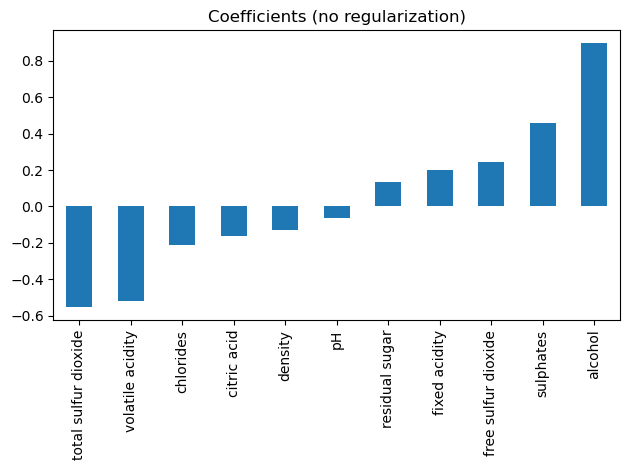

Training Score 0.7727598566308242
Testing Score 0.7266666666666667
Ridge-regularized Training Score 0.7727598566308242
Ridge-regularized Testing Score 0.7266666666666667


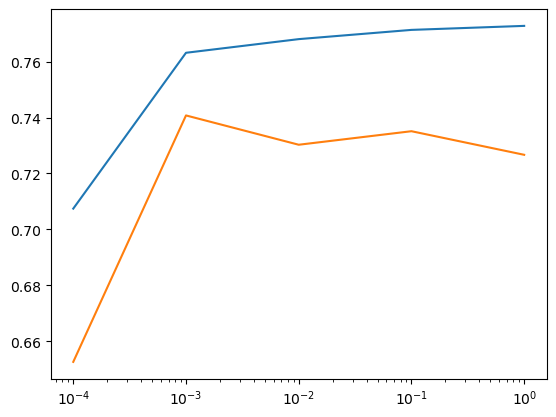

{'C': 0.0019630406500402726} 0.7723336222647887
0.7407407407407408
Best C value [0.25950242]
Best fit coefficients [[ 0.11645645 -0.5564137  -0.17273342  0.03124503 -0.17326419  0.20054081
  -0.50583395  0.         -0.07043069  0.43221346  0.94105221]]


<Figure size 640x480 with 0 Axes>

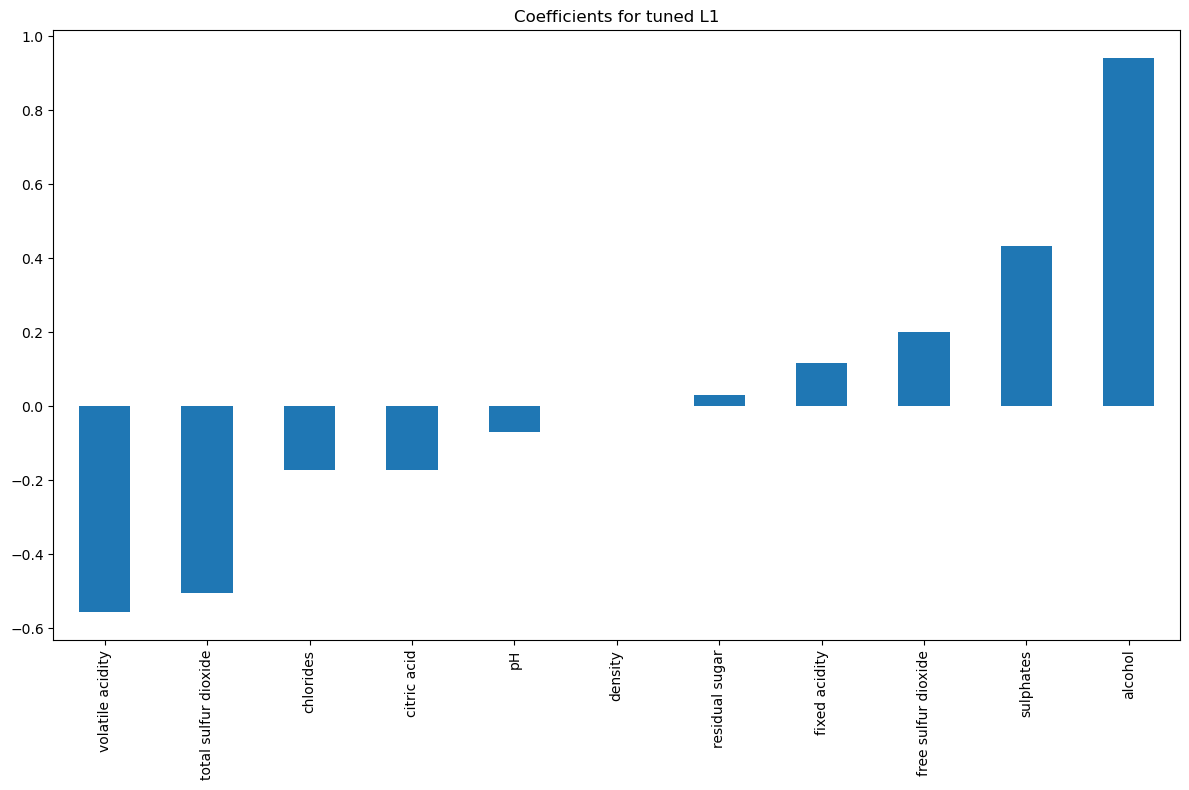

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine_quality.csv')
print(df.columns)
y = df['quality']
features = df.drop(columns = ['quality'])


## 1. Data transformation
from sklearn.preprocessing import StandardScaler
standard_scaler_fit = StandardScaler().fit(features)
X = standard_scaler_fit.transform(features)

## 2. Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.2)

## 3. Fit a logistic regression classifier without regularization
from sklearn.linear_model import LogisticRegression
clf_no_reg = LogisticRegression(penalty='none')
clf_no_reg.fit(x_train,y_train)

## 4. Plot the coefficients
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()

## 5. Training and test performance
from sklearn.metrics import f1_score
y_pred_test = clf_no_reg.predict(x_test)
y_pred_train = clf_no_reg.predict(x_train)
print('Training Score', f1_score(y_train, y_pred_train))
print('Testing Score', f1_score(y_test, y_pred_test))

## 6. Default Implementation (L2-regularized!)
clf_default = LogisticRegression()
clf_default.fit(x_train, y_train)

## 7. Ridge Scores
y_pred_train = clf_default.predict(x_train)
y_pred_test = clf_default.predict(x_test)

print('Ridge-regularized Training Score', f1_score(y_train, y_pred_train))
print('Ridge-regularized Testing Score', f1_score(y_test, y_pred_test))

## This means that the constraint boundary for the regularization we performed is large enough to hold the original loss function minimum, 
## thus rendering our model the same as the unregularized one.

## 8. Coarse-grained hyperparameter tuning
training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1]
for x in C_array:
    clf = LogisticRegression(C = x )
    clf.fit(x_train, y_train)
    y_pred_test = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)
    training_array.append(f1_score(y_train, y_pred_train))
    test_array.append(f1_score(y_test, y_pred_test))


## 9. Plot training and test scores as a function of C
plt.plot(C_array,training_array)
plt.plot(C_array,test_array)
plt.xscale('log')
plt.show()
plt.clf()


## 10. Making a parameter grid for GridSearchCV
C_array = np.logspace(-4,-2,100)
tuning_c = {'C':C_array}

## 11. Implementing GridSearchCV with l2 penalty
from sklearn.model_selection import GridSearchCV
clf_gs = LogisticRegression()
gs = GridSearchCV(clf_gs, param_grid = tuning_c, scoring = 'f1', cv = 5)
gs.fit(x_train,y_train) 


## 12. Optimal C value and the score corresponding to it
print(gs.best_params_, gs.best_score_)

## 13. Validating the "best classifier"
clf_best = LogisticRegression(C = gs.best_params_['C'])
clf_best.fit(x_train,y_train)
y_pred_best = clf_best.predict(x_test)
print(f1_score(y_test,y_pred_best))


## 14. Implement L1 hyperparameter tuning with LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV
C_array = np.logspace(-2,2,100)
clf_l1 = LogisticRegressionCV(Cs=C_array, cv = 5, penalty = 'l1', scoring = 'f1', solver = 'liblinear')
clf_l1.fit(X,y)

## 15. Optimal C value and corresponding coefficients
print('Best C value', clf_l1.C_)
print('Best fit coefficients', clf_l1.coef_)


## 16. Plotting the tuned L1 coefficients
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()

plt.figure(figsize = (12,8))
coef.plot(kind='bar', title = 'Coefficients for tuned L1')
plt.tight_layout()
plt.show()
plt.clf()